## Clustering with K Means 

In [1]:
import pandas as pd, seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data[:, 2:], columns=['length', 'width'])
df.head()

,length,width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


<AxesSubplot:xlabel='length', ylabel='width'>

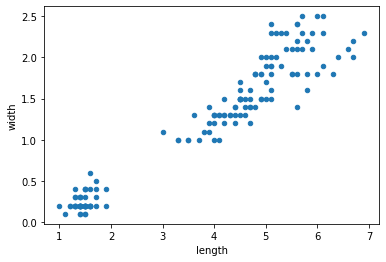

In [3]:
df.plot.scatter('length', 'width')

In [4]:
scaler = MinMaxScaler()

scaler.fit(df[['length']])
df['length'] = scaler.transform(df[['length']])

scaler.fit(df[['width']])
df['width'] = scaler.transform(df[['width']])

In [5]:
df.head()

,length,width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


<AxesSubplot:xlabel='length', ylabel='width'>

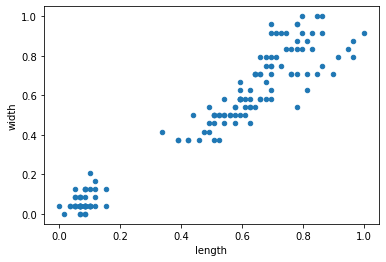

In [6]:
df.plot.scatter('length', 'width')

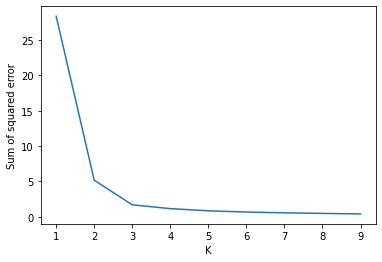

In [7]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
km_2 = KMeans(n_clusters=2)
df['div_2'] = km_2.fit_predict(df)

km_3 = KMeans(n_clusters=3)
df['div_3'] = km_3.fit_predict(df)

df.head()

,length,width,div_2,div_3
0,0.067797,0.041667,1,0
1,0.067797,0.041667,1,0
2,0.050847,0.041667,1,0
3,0.084746,0.041667,1,0
4,0.067797,0.041667,1,0


<AxesSubplot:xlabel='length', ylabel='width'>

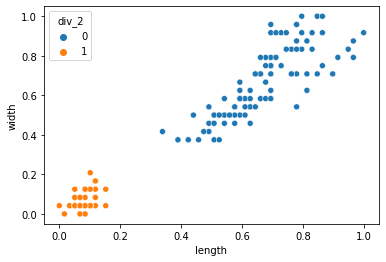

In [9]:
sns.scatterplot('length', 'width', hue='div_2', data=df)

<AxesSubplot:xlabel='length', ylabel='width'>

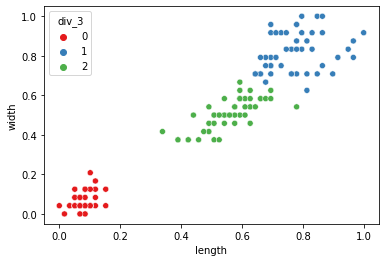

In [10]:
sns.scatterplot('length', 'width', hue='div_3', data=df, palette='Set1')

## With Pipeline

In [11]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', KMeans(n_clusters=3)),
])

In [12]:
iris = load_iris()
df = pd.DataFrame(iris.data[:, 2:], columns=['length', 'width'])
df['div_3'] = clf.fit_predict(df)
df.sample(5)

,length,width,div_3
79,3.5,1.0,0
17,1.4,0.3,2
88,4.1,1.3,0
42,1.3,0.2,2
119,5.0,1.5,0


<AxesSubplot:xlabel='length', ylabel='width'>

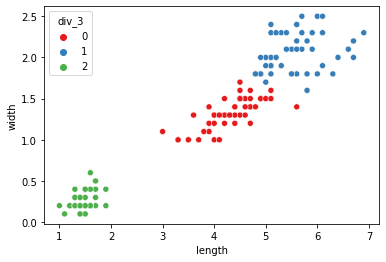

In [13]:
sns.scatterplot('length', 'width', hue='div_3', data=df, palette='Set1')